<a href="https://colab.research.google.com/github/shivamkainth/mnist-tsne/blob/master/my%20notebook%20for%20tsne%20mnist_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
!git clone https://github.com/shivamkainth/mnist-tsne.git

In [3]:
#read data from mnist dataset using pandas
dataframe = pd.read_csv('/content/gdrive/My Drive/traindata/mnist_train.csv')
print(dataframe.head(10))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ... 

In [0]:
label=dataframe['label']

In [0]:
d=dataframe.drop("label",axis=1)

In [6]:
print(d.shape)

(42000, 784)


In [7]:
print(label.shape)

(42000,)


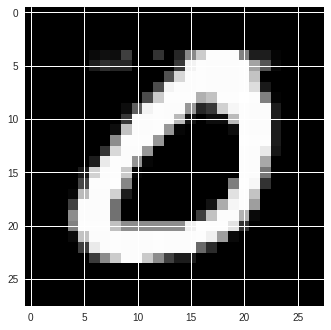

0


In [8]:
plt.figure()
idx=4650
grid_data= d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none", cmap="gray")
plt.show()
print(label[idx])

## 2d visualization using PCA

In [9]:
# data preprocessing:atandardizing the data
from sklearn.preprocessing import StandardScaler
Standardized_data= StandardScaler().fit_transform(d)
print(Standardized_data.shape)
labels = label

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
sample_data=Standardized_data

In [11]:
covar_matrix=np.matmul(sample_data.T,sample_data)
print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [12]:
#find the top two eigen values ie. 783,784 after arranging them in assendoing order
from scipy.linalg import eigh

#@ the parameter 'eigvals is defined'
values,vectors = eigh(covar_matrix,eigvals=(782,783))
print(vectors.shape)
vectors = vectors.T
print("updated shape of eigen vectors",vectors.shape)

(784, 2)
updated shape of eigen vectors (2, 784)


In [13]:
# now projhecting the data on to plane by using only two eigen vectors
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print ("resultant new data points' shape",vectors.shape, "X", sample_data.T.shape," = ",new_coordinates.shape)

resultant new data points' shape (2, 784) X (784, 42000)  =  (2, 42000)


In [14]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, labels)).T

data_frame = pd.DataFrame(data = new_coordinates, columns = ("1st_principal", "2nd principal","label"))
print (data_frame.head())

   1st_principal  2nd principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


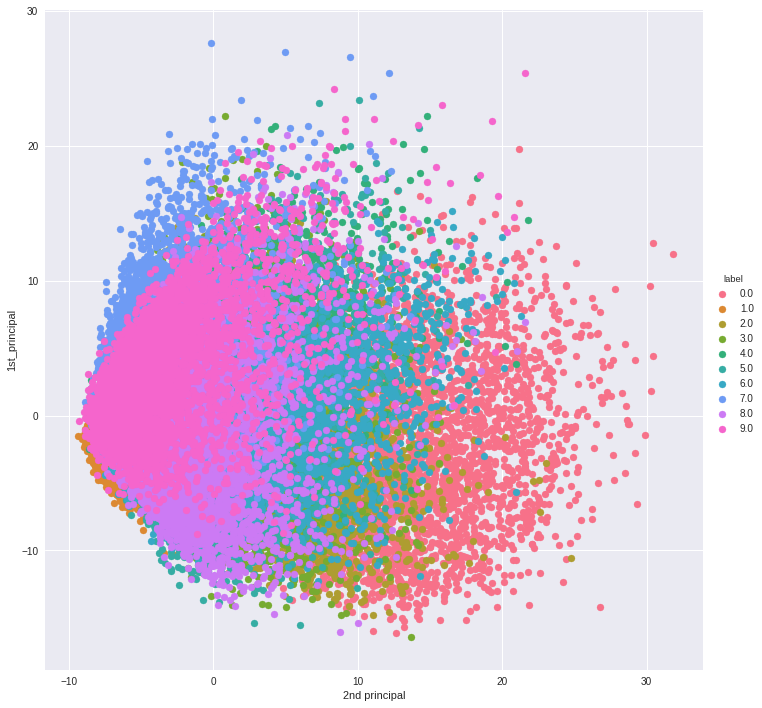

In [15]:
import seaborn as sn
sn.FacetGrid(data_frame, hue="label",size =10).map(plt.scatter,'2nd principal','1st_principal').add_legend()
plt.show()

### PCA for dimensionality reduction 

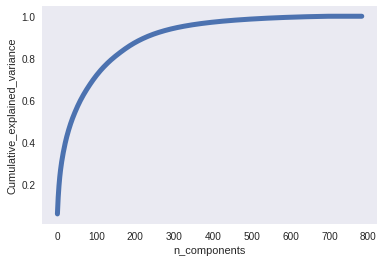

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

#Plot the PCA spectrum
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=5)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### PCA using Scikit-Learn

In [17]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
# pca_reduced will contain the 2-d projects of the sample data
print("shape of pca_reduced.shape",pca_data.shape)

shape of pca_reduced.shape (42000, 2)


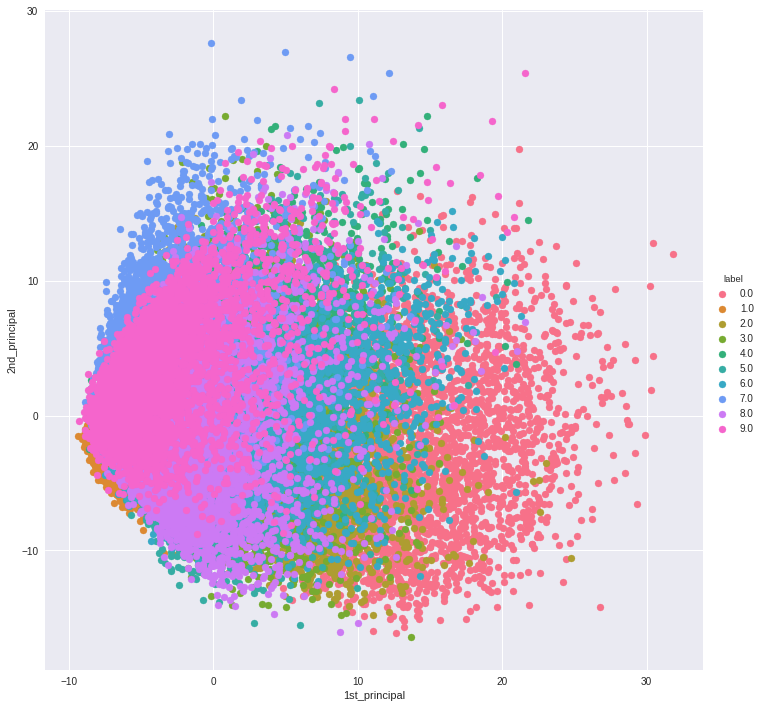

In [18]:
# attaching the label  for each 2-d data point
pca_data = np.vstack((pca_data.T,labels)).T
#print(pca_data.shape)
pca_df= pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(pca_df,hue="label",size=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

### T-sne using Scikit-Learn

In [0]:
#TSNE
import sklearn
from sklearn.manifold import TSNE
tsne_data= Standardized_data
model= TSNE(n_components =2, random_state=1)
tsne_data= model.fit_transform(tsne_data)

print(tsne_data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df =pd.DataFrame(data=tsne_data,columns=("1st_principal","2nd_principal","label","test"))
sn.FacetGrid(tsne_df, hue= "label",size=8).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()